### Buisness Problem

In [1]:
# Develop a machine learning model to detect fraudulent transactions using a Kaggle dataset,
# with a focus on data handling, model training, evaluation, and explainability. Implementing an
# unsupervised model will be given higher preference to showcase skills in handling
# unlabelled data and anomaly detection.

### Import libraries

In [2]:
import pandas as pd
import numpy as np

# Import Algorithm
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from xgboost import plot_importance
import shap

# Scaling
from sklearn.preprocessing import StandardScaler

# Imbalance Handling
from imblearn.over_sampling import SMOTE

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Evaluation
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

#ignore warning
import warnings
warnings.filterwarnings("ignore")

### 1)Data Gathering

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Shape

In [4]:
df.shape

(284807, 31)

# First 5 records for data overview

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# All features with their data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 1)Data Exploration and Preprocessing

In [7]:
# ● Goal: Analyze and prepare the data for model training.

# Steps

 - Checking Statistical analysis (Mean,Median,Mode,Std,Min,Max,25% data,50%data,75%data)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Class Distribution

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### feature distribution

1) Histogram for a single feature

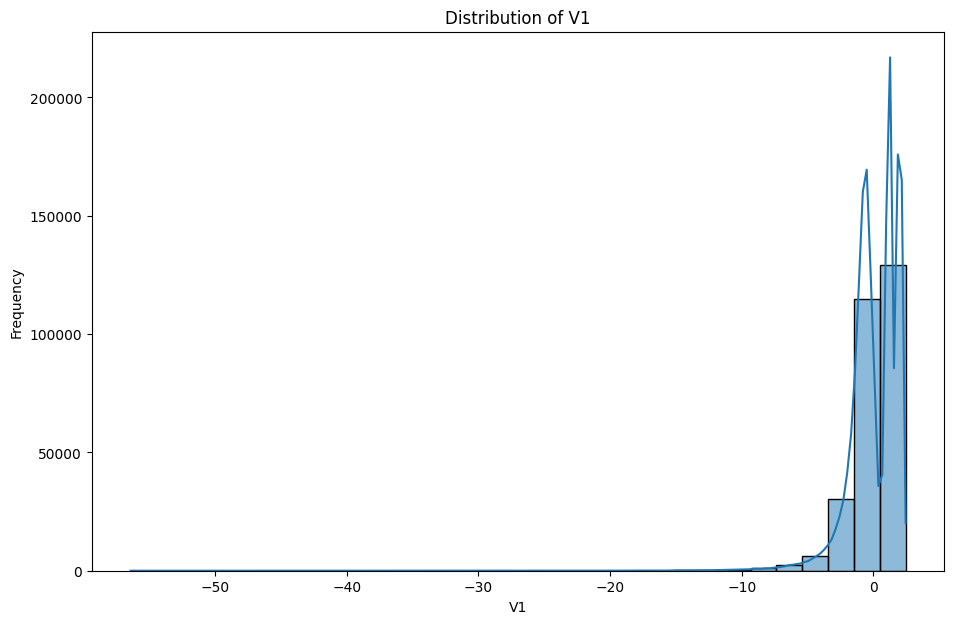

In [10]:
plt.figure(figsize=(11, 7))
sns.histplot(df['V1'], bins=30, kde=True) 
plt.title('Distribution of V1')
plt.xlabel('V1')
plt.ylabel('Frequency')
plt.show()

 2) Boxplot

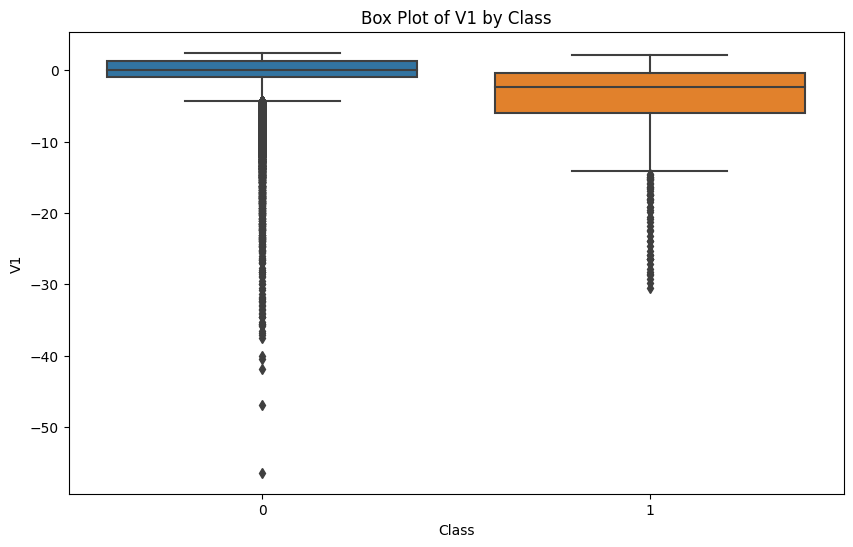

In [11]:
# Comparing feature distribution across classes
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Class'], y=df['V1'])  
plt.title('Box Plot of V1 by Class')
plt.xlabel('Class')
plt.ylabel('V1')
plt.show()

- Correlation Matrix

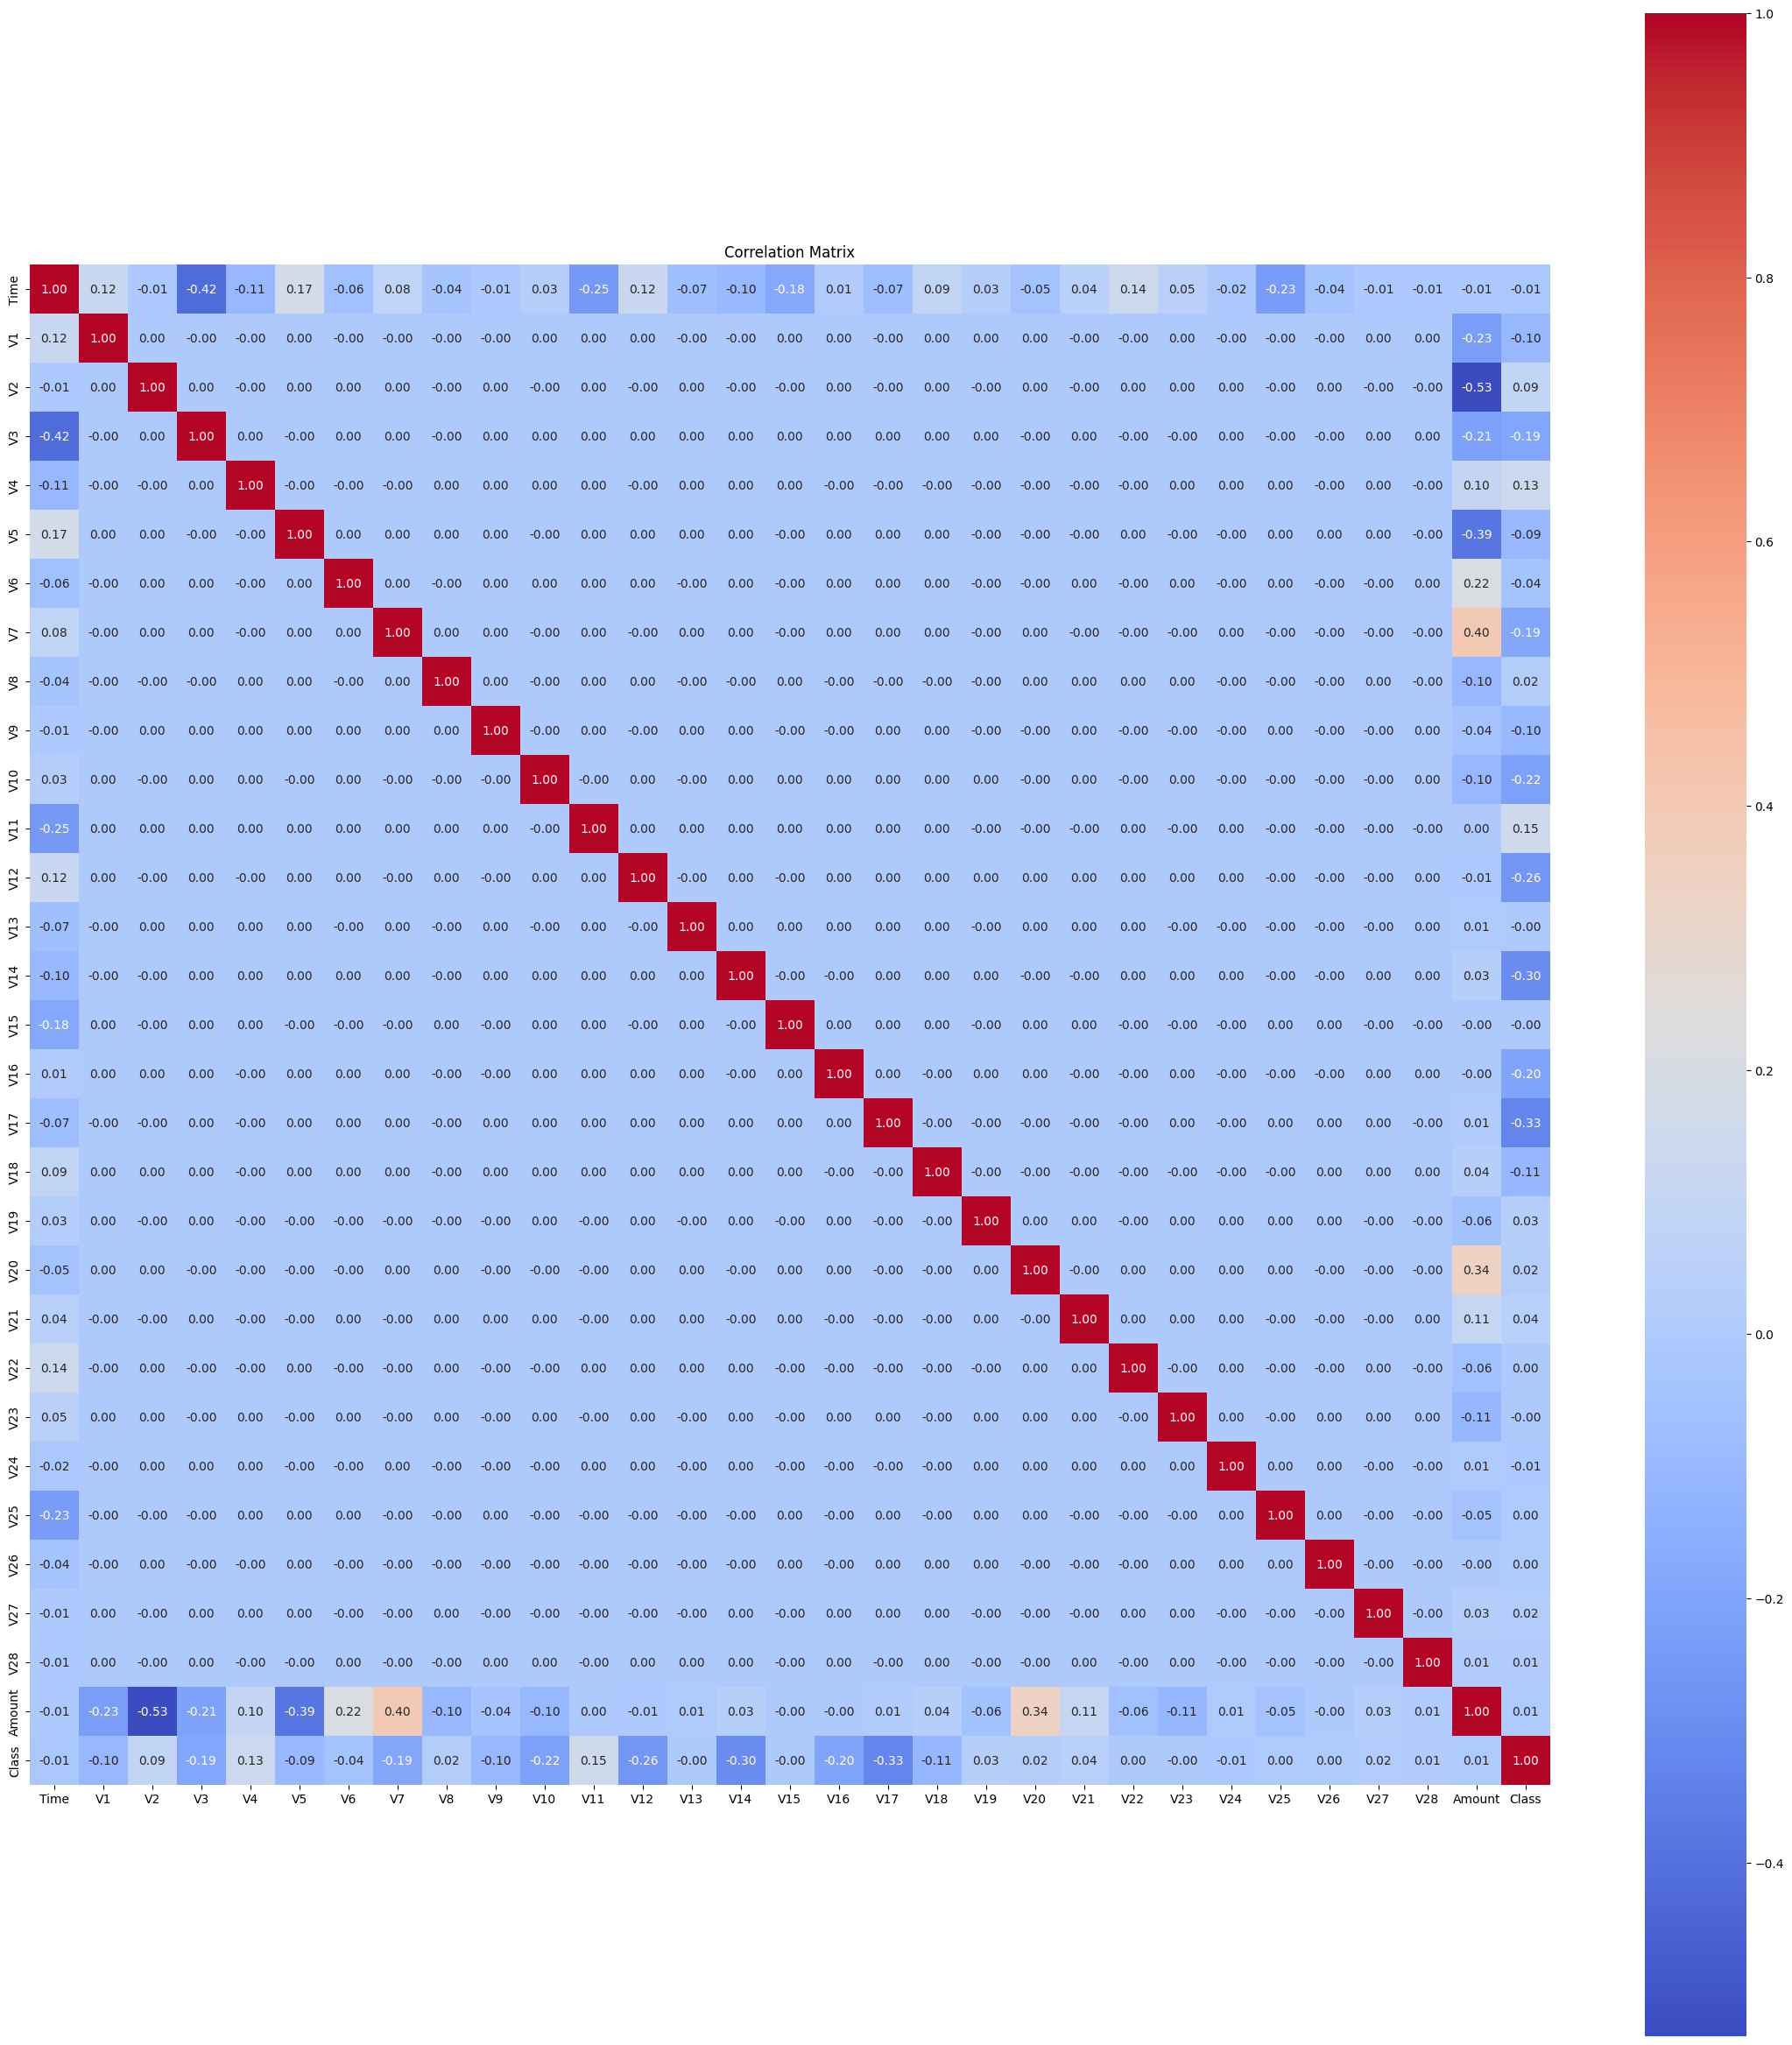

In [12]:
plt.figure(figsize=(28, 30))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

- Distribution of the Target Variable

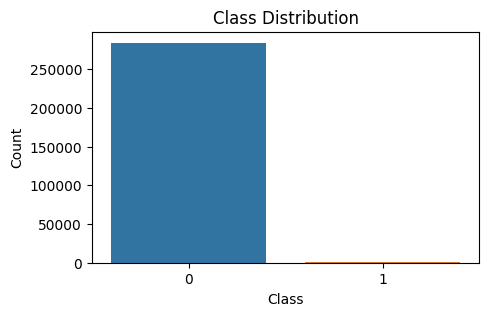

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Missing detection

In [14]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.isna().mean()*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### Handle Missing Values

In [16]:
# Here we couldnt see any missing values in the dataset so no need to handle missing values here.
# if missing value present in the dataset then sometimes we can drop those missing value or we can fill the missing by
# statistical techniques like mean,median,mode,ffill and bfill methods

In [17]:
# dropping the missing values
df.dropna(inplace=True)

### Data Transformation

In [18]:
# Scale following (V1,V2,V3) feature
std_scalar = StandardScaler()
df[['V1', 'V2', 'V3']] = std_scalar.fit_transform(df[['V1', 'V2', 'V3']])

In [19]:
# After standardization Dataframe looklike
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,0.608496,0.161176,0.109797,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.693500,-0.811578,1.169468,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.493325,-0.112169,1.182516,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-0.591330,0.531541,1.021412,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Imbalance Handling

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42) 
X_res, y_res = smote.fit_resample(X, y)
print(y_res.value_counts())

0    284315
1    284315
Name: Class, dtype: int64


## 2. Model Development (Supervised)

 - Implementing Logistic regression model

In [21]:
# fixing the target
X = df.drop('Class',axis=1)
y = df['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     56750
           1       0.98      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



- Implementing XGBoost Model

In [23]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



- hyperparameter tuning 

In [24]:
# # Define a smaller parameter grid for quick tuning
# param_dist = {
#     'max_depth': [3, 5],  # Fewer options
#     'learning_rate': [0.1, 0.2],  # Focused range
#     'n_estimators': [100, 200]  # Limited options
# }

# # Set up the randomized search with reduced iterations and folds
# random_search = RandomizedSearchCV(
#     XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Model
#     param_distributions=param_dist,  # Parameter grid
#     n_iter=5,  # Fewer combinations to try
#     scoring='f1',  # F1 score as the evaluation metric
#     cv=3,  # 3-fold cross-validation for speed
#     verbose=0,  # Suppress detailed output
#     random_state=42,
#     n_jobs=-1  # Use all available cores
# )

# # Fit the model and output results
# random_search.fit(X_train, y_train)

# # Display the best parameters and score
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)


### 3. Model Development (Unsupervised)

In [25]:
# ● Goal: Implement an unsupervised model to identify potential fraudulent activities.

- Steps

### Using Isolation Forest Algorithm

In [26]:
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X)
anomalies = iso_forest.predict(X)
anomalies

array([1, 1, 1, ..., 1, 1, 1])

### Anomalies Detecting

In [27]:
detected_anomalies = df[anomalies == -1]
detected_anomalies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-3.110875,-7.336142,-3.755953,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
225,147.0,-1.372333,2.658642,-1.556788,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
362,266.0,-1.309527,1.496382,1.747346,-1.564256,1.794297,-0.614742,4.185906,-3.855359,5.436633,...,-1.672706,-0.463149,-0.532466,0.306494,0.226844,-0.365416,-0.936735,-2.733887,10.35,0
401,290.0,-2.637627,-3.300037,1.970976,2.658991,1.948152,-0.854470,-0.326394,-1.017364,1.983901,...,-1.297221,1.172278,3.150413,0.574081,1.018394,0.987099,0.658283,-1.609716,85.00,0
601,454.0,-1.599992,1.748552,1.436891,-1.576535,1.434510,-0.687313,3.816056,-3.416915,5.459274,...,-1.659610,-0.498518,-0.476668,0.302196,0.299993,-0.359155,-0.958818,-2.735623,9.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284393,172401.0,-2.334208,2.423317,-0.452647,-2.340542,1.680291,-0.634889,3.478058,-2.874886,6.437965,...,-1.182248,1.511540,-0.372606,-0.430795,-0.079541,-0.715266,-1.310732,-3.320889,0.89,0
284448,172454.0,-2.618475,2.685487,-0.760146,-2.357638,1.316643,-0.703130,3.111958,-2.436404,6.459490,...,-1.169530,1.479393,-0.302331,-0.435989,-0.003085,-0.708154,-1.330861,-3.323162,1.79,0
284649,172642.0,-6.099465,5.918141,-5.280280,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,...,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284795,172778.0,-6.390351,6.169553,-5.590541,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


### 4) Model Evaluation

- Supervised Model Evaluation

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56750
       Fraud       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56733    17]
 [    0 56976]]


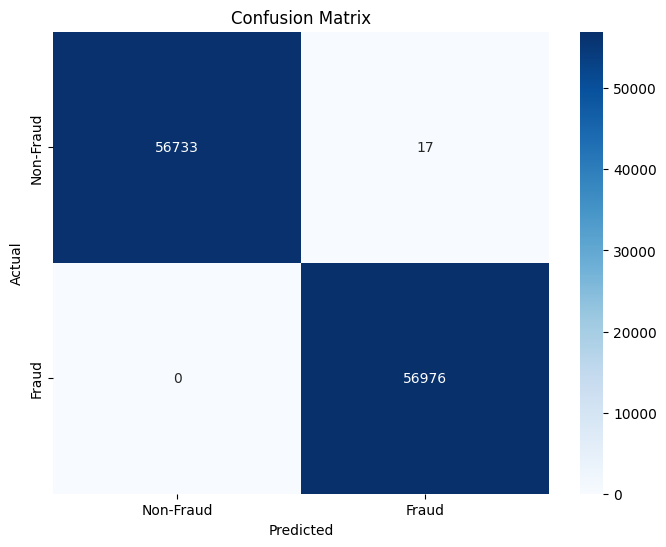

In [28]:
y_pred = xgb_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"])
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- Visualizing ROC-AUC and PR-AUC Curves

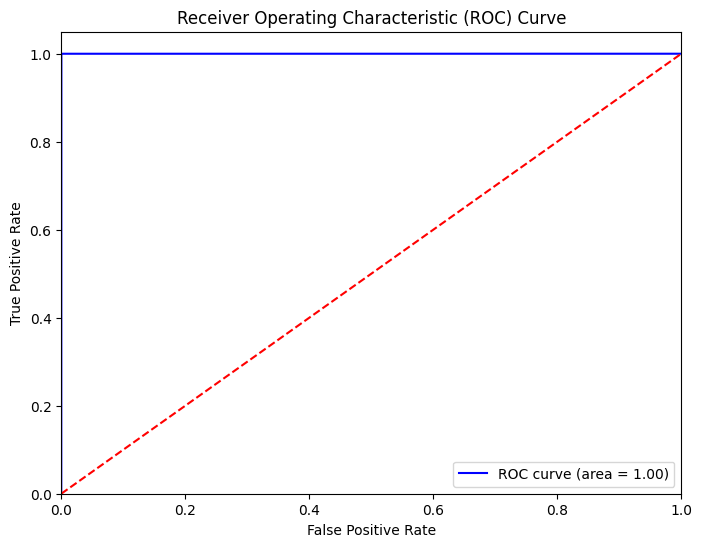

In [29]:
#  ROC curve and ROC_AUC
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- PR-AUC Curve

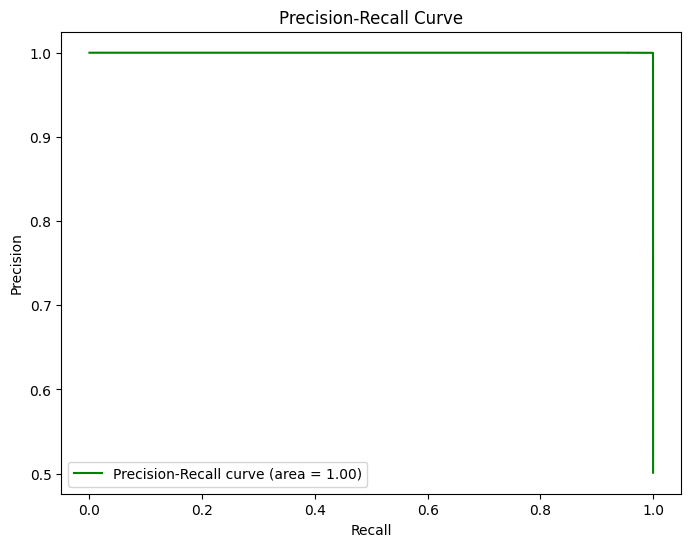

In [30]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

- Unsupervised Models Evaluation

### Identify Anomalies

In [31]:
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X)
anomalies = iso_forest.predict(X)

In [32]:
anomaly_df = pd.DataFrame({'Actual': y, 'Predicted': anomalies})
anomaly_df

,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
284802,0,-1
284803,0,1
284804,0,1
284805,0,1


### Evaluate against Known Fraudulent Transactions

In [33]:
true_frauds = anomaly_df[(anomaly_df['Actual'] == 1) & (anomaly_df['Predicted'] == -1)]
detected_frauds = len(true_frauds)
total_frauds = sum(y == 1)

print(f'Detected Frauds: {detected_frauds} out of {total_frauds}')


Detected Frauds: 265 out of 492


## 5)Basic Explainability

In [34]:
# ● Goal: Provide insights into model behavior and feature importance.

- Feature Importance for XGBoost:

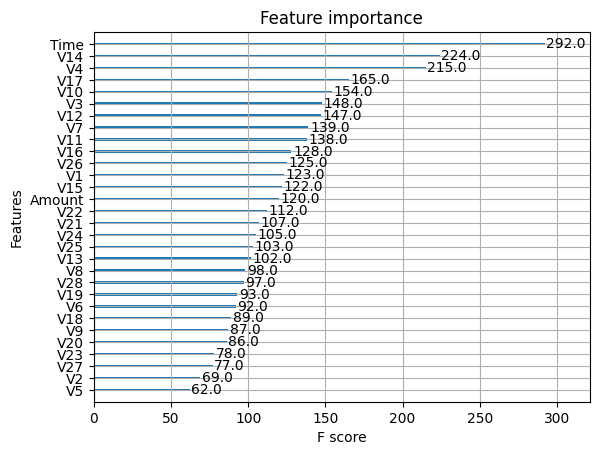

In [35]:
plot_importance(xgb_model)
plt.show()

- Access Feature Importance Scores

In [36]:
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
14     V14    0.693303
4       V4    0.047252
12     V12    0.042433
17     V17    0.025897
8       V8    0.017253
3       V3    0.015340
1       V1    0.013506
13     V13    0.011097
10     V10    0.009533
23     V23    0.009463
11     V11    0.009203
29  Amount    0.008905
9       V9    0.007677
0     Time    0.007200
16     V16    0.006642
15     V15    0.006635
19     V19    0.006561
21     V21    0.006518
18     V18    0.006420
26     V26    0.006114
25     V25    0.005833
6       V6    0.005548
7       V7    0.005314
22     V22    0.004348
2       V2    0.004303
28     V28    0.004205
24     V24    0.003838
20     V20    0.003293
27     V27    0.003255
5       V5    0.003109


- Using SHAP for Interpretability

100%|===================| 113596/113726 [09:43<00:00]        

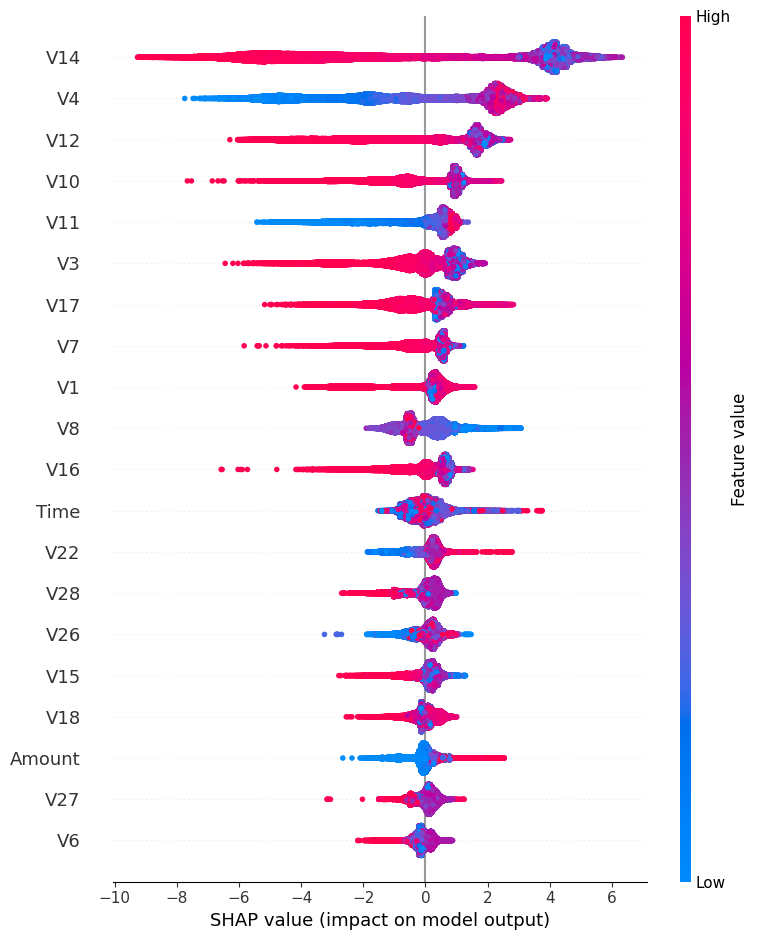

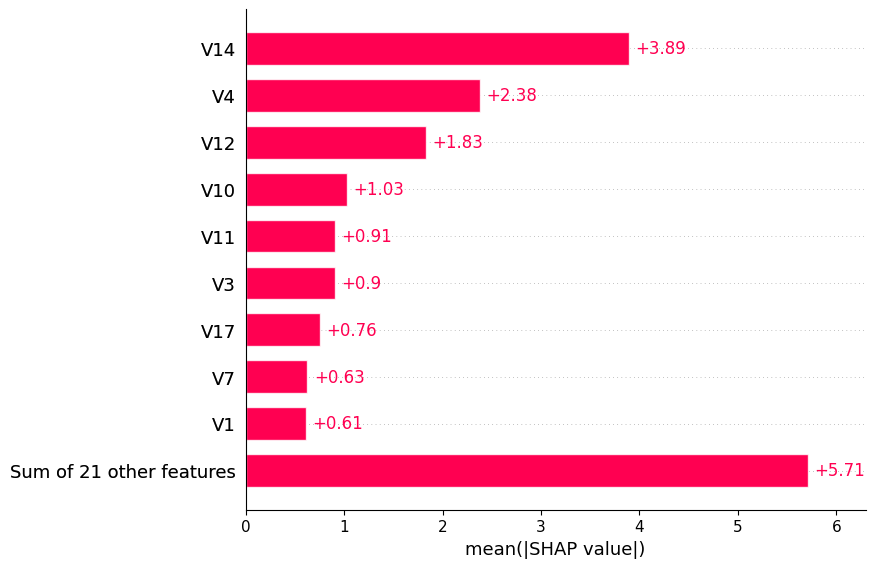

In [37]:
# SHAP values for interpretability
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)


# Bar plot of mean absolute SHAP values
shap.plots.bar(shap_values)
